In [1]:
import os
import pandas as pd
import numpy as np
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate

In [3]:
output_dir_ccle = 'C:\\Users\\MONSTER\\Desktop\\BİYOİNFO 2\\PYTHON\\YAPAY ZEKA 2\\PROJE CCLE\\Project Output'
output_dir_gdsc = 'C:\\Users\\MONSTER\\Desktop\\BİYOİNFO 2\\PYTHON\\YAPAY ZEKA 2\\PROJE GDSC'

In [4]:
os.chdir(output_dir_ccle)

In [5]:
histologies = [item1 for item1 in os.listdir() if os.path.isdir(item1)]

In [6]:
histologies

['aero_dig_tract',
 'breast',
 'digestive_system',
 'kidney',
 'large_intestine',
 'leukemia',
 'lung',
 'lymphoma',
 'myeloma',
 'nervous_system',
 'pancreas',
 'skin',
 'thyroid',
 'urogenital_system']

aero_dig_tract
AZD6244
        Histology     Drug  Number of Sample-Train Data (CCLE)  \
0  aero_dig_tract  AZD6244                                  73   

   Number of Sample-Test Data (GDSC)   Number of Feature  Name of Features  \
0                                  67                  2  {METTL7A, NUAK1}   

   TPs (True Positives)  TNs (True Negatives)  FPs (False Positives)  \
0                     9                     2                     56   

   FNs (False Negatives)  Precision   Recall  F1 Score  Accuracy       AUC  
0                      0   0.685548  0.66904     0.669  0.806667  0.517241  
breast
17-AAG
  Histology    Drug  Number of Sample-Train Data (CCLE)  \
0    breast  17-AAG                                 279   

   Number of Sample-Test Data (GDSC)   Number of Feature Name of Features  \
0                                  44                  2     {LEO1, IDH1}   

   TPs (True Positives)  TNs (True Negatives)  FPs (False Positives)  \
0                     0     

leukemia
PD-0325901
  Histology        Drug  Number of Sample-Train Data (CCLE)  \
0  leukemia  PD-0325901                                  21   

   Number of Sample-Test Data (GDSC)   Number of Feature Name of Features  \
0                                  73                  1          {ICAM1}   

   TPs (True Positives)  TNs (True Negatives)  FPs (False Positives)  \
0                    12                    21                     37   

   FNs (False Negatives)  Precision    Recall  F1 Score  Accuracy       AUC  
0                      3       0.65  0.591667  0.599048       0.7  0.581034  
leukemia
Lapatinib
  Histology       Drug  Number of Sample-Train Data (CCLE)  \
0  leukemia  Lapatinib                                  28   

   Number of Sample-Test Data (GDSC)   Number of Feature Name of Features  \
0                                  68                  1          {PPIL6}   

   TPs (True Positives)  TNs (True Negatives)  FPs (False Positives)  \
0                     1   

pancreas
17-AAG
  Histology    Drug  Number of Sample-Train Data (CCLE)  \
0  pancreas  17-AAG                                 279   

   Number of Sample-Test Data (GDSC)   Number of Feature Name of Features  \
0                                  24                  2     {LEO1, IDH1}   

   TPs (True Positives)  TNs (True Negatives)  FPs (False Positives)  \
0                     0                    22                      0   

   FNs (False Negatives)  Precision    Recall  F1 Score  Accuracy  AUC  
0                      2   0.570832  0.530285  0.525586  0.817338  0.5  
pancreas
PD-0325901
  Histology        Drug  Number of Sample-Train Data (CCLE)  \
0  pancreas  PD-0325901                                 136   

   Number of Sample-Test Data (GDSC)   Number of Feature Name of Features  \
0                                  23                  1         {POLR1D}   

   TPs (True Positives)  TNs (True Negatives)  FPs (False Positives)  \
0                     2                     6

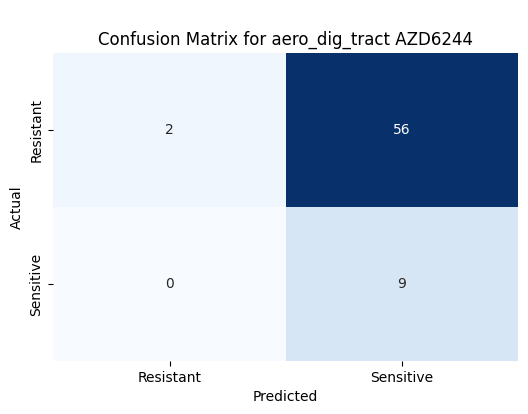

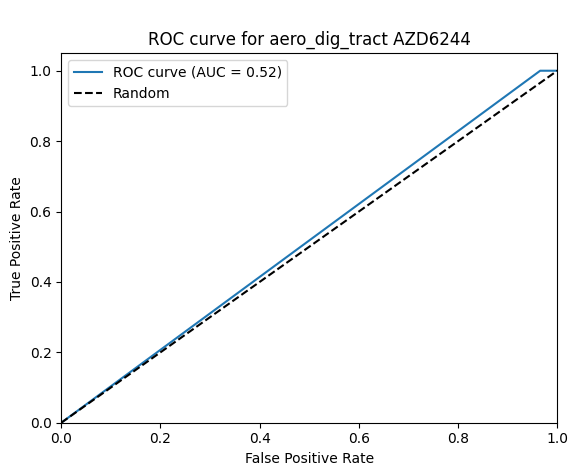

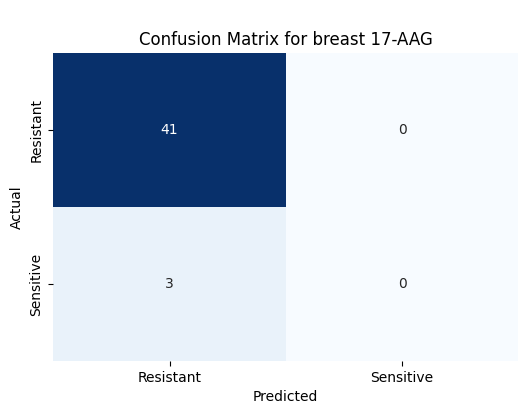

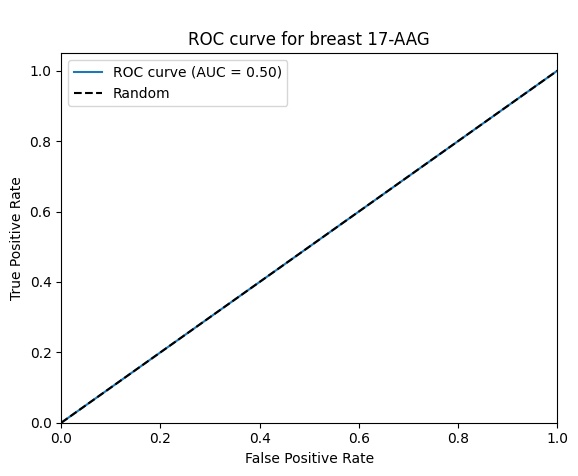

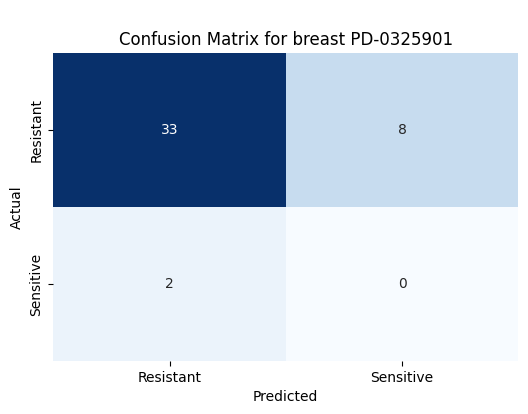

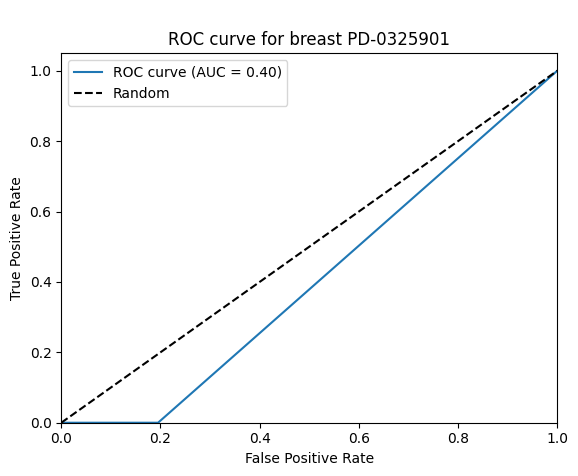

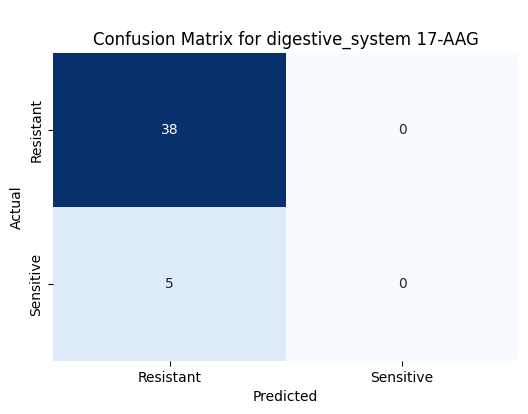

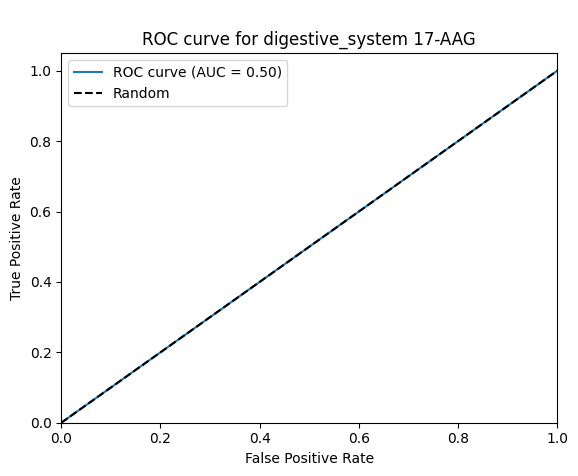

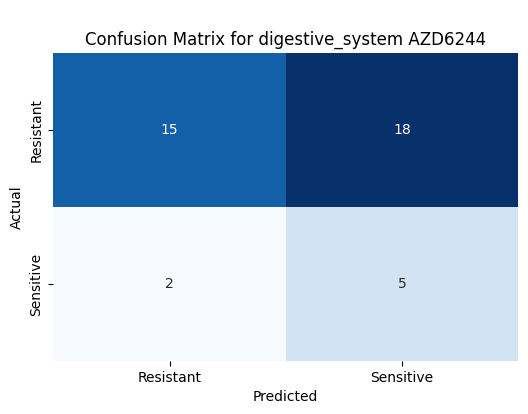

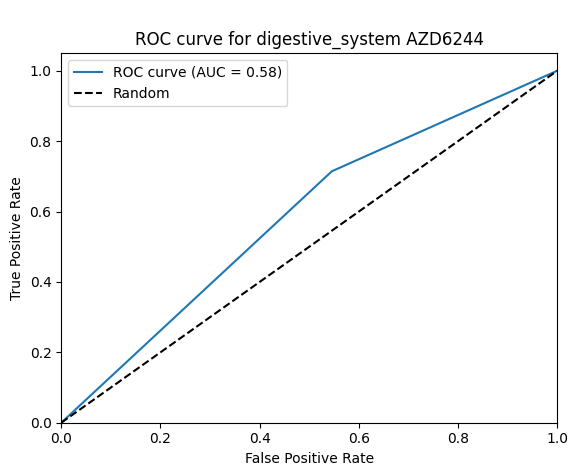

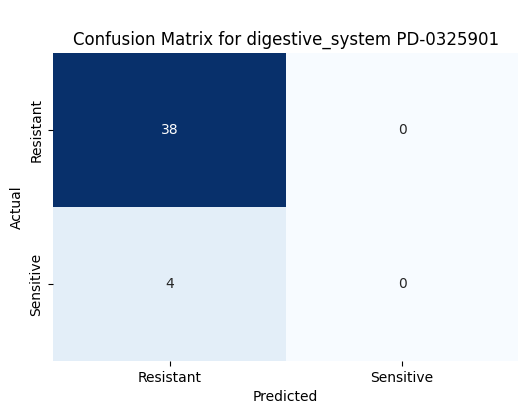

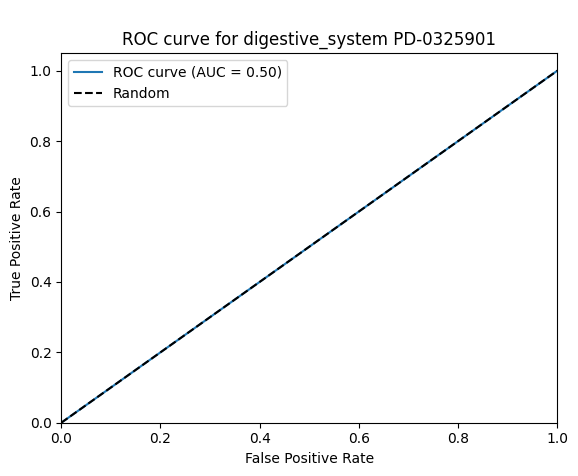

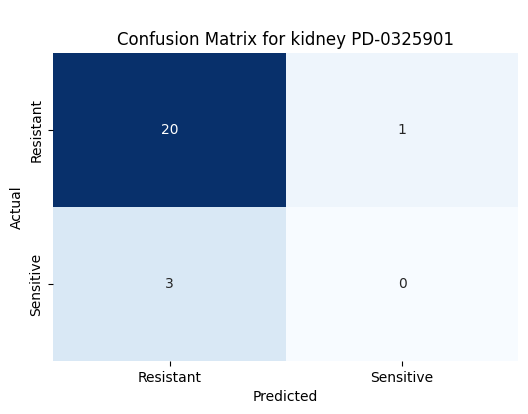

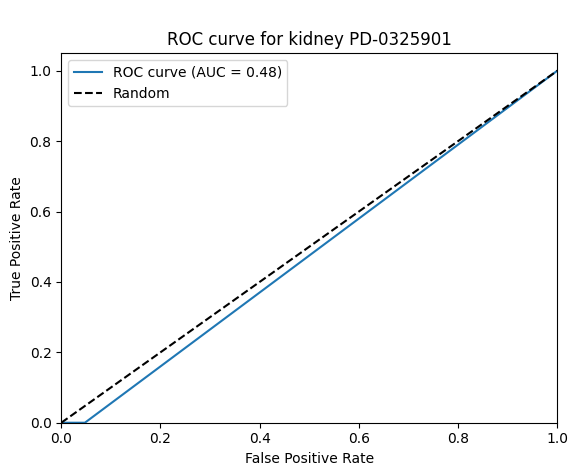

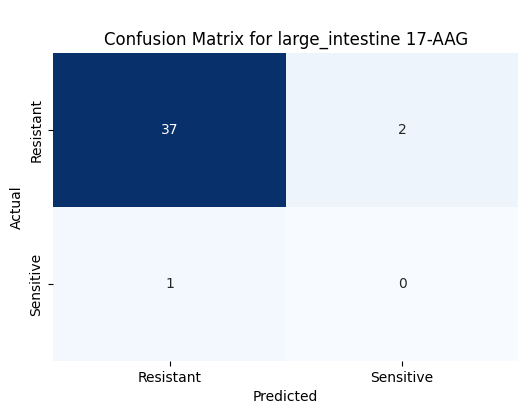

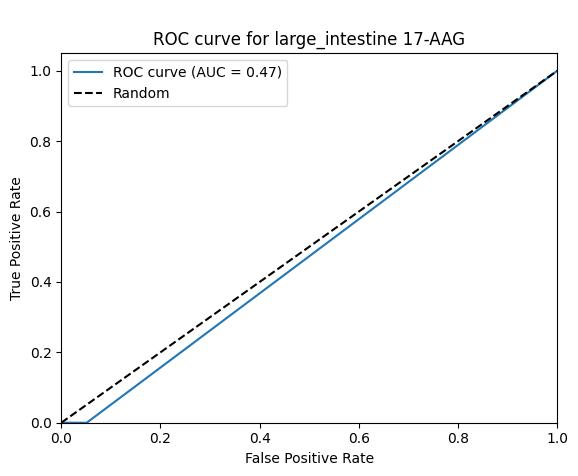

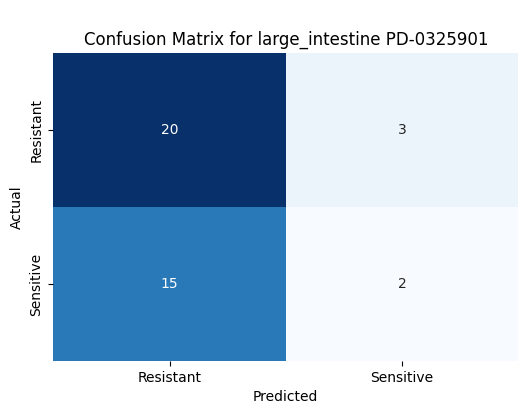

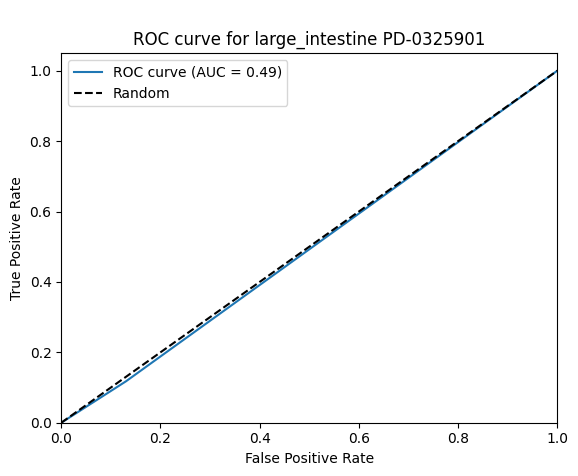

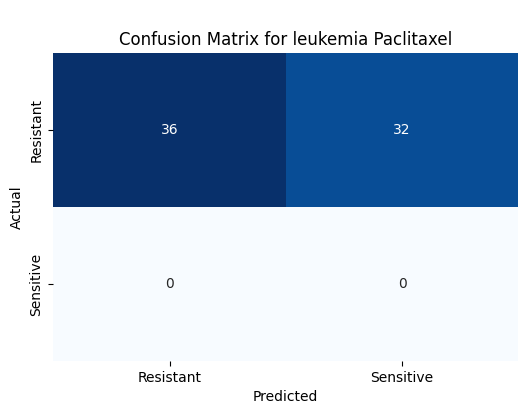

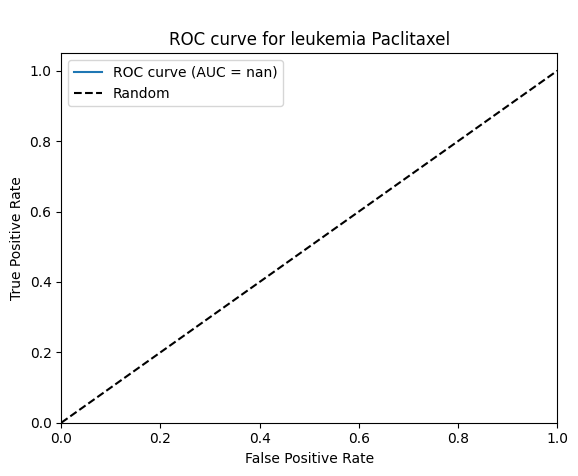

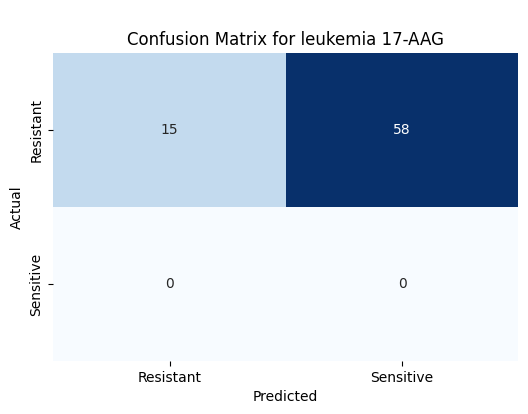

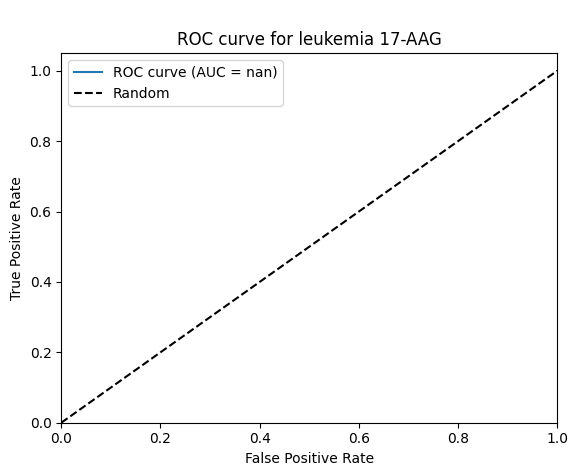

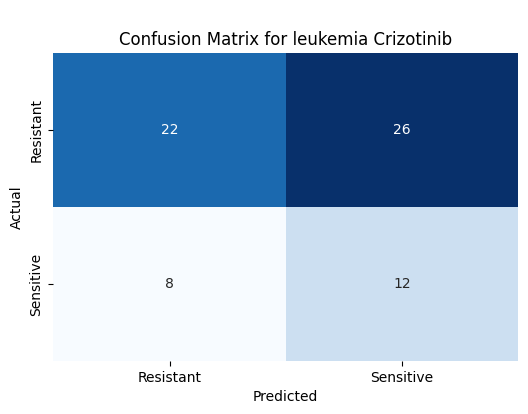

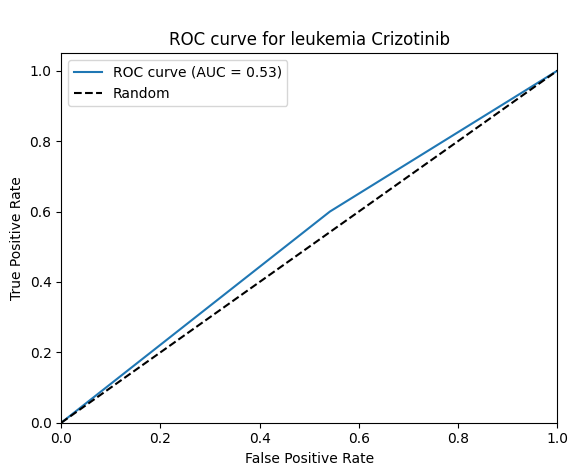

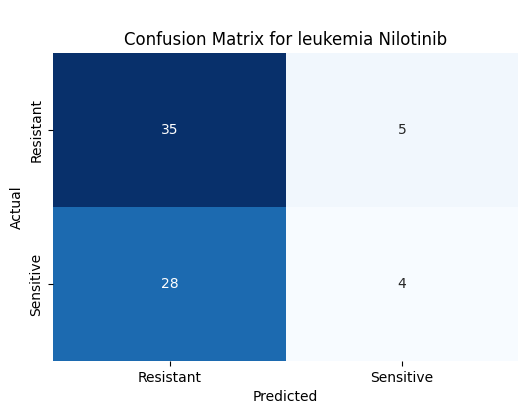

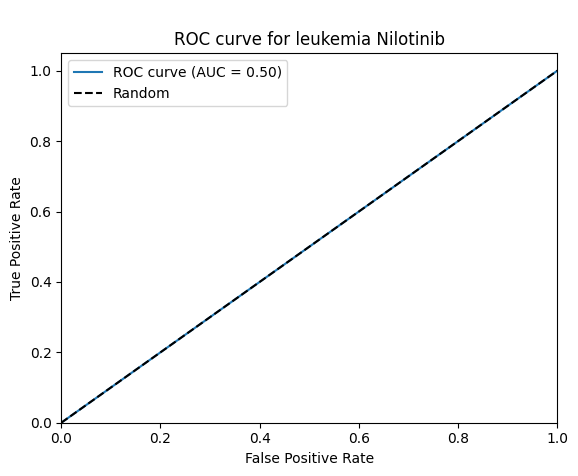

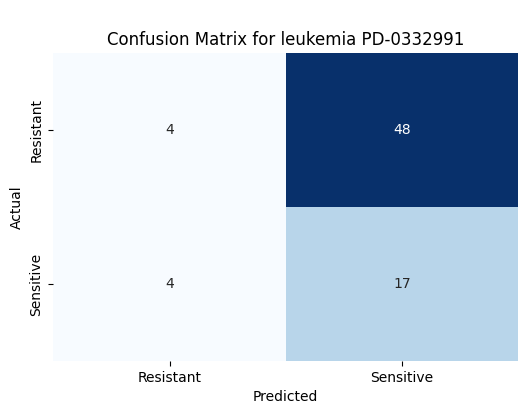

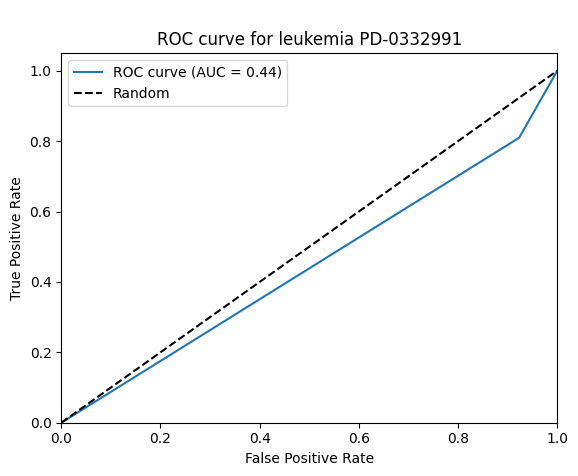

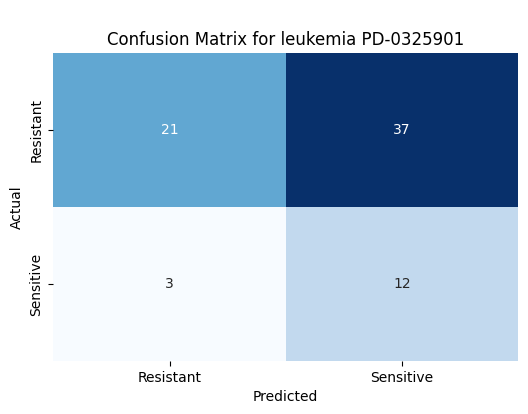

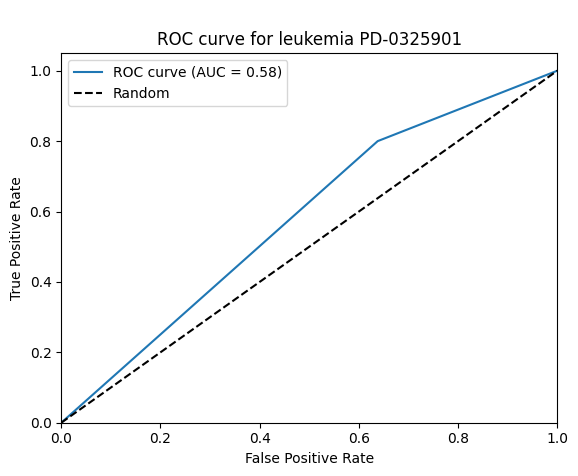

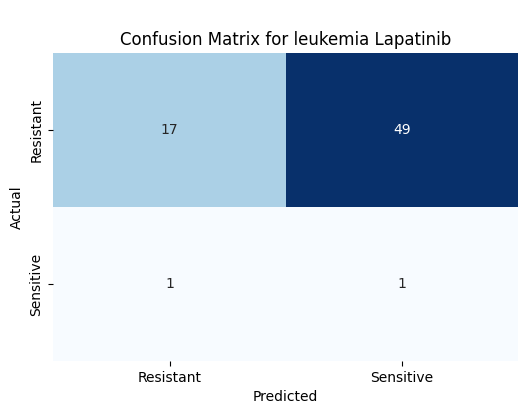

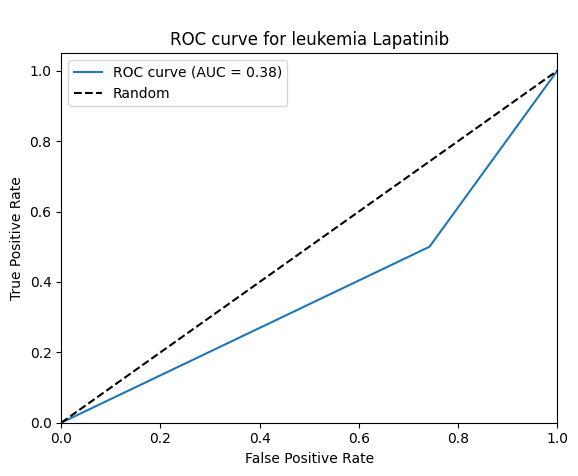

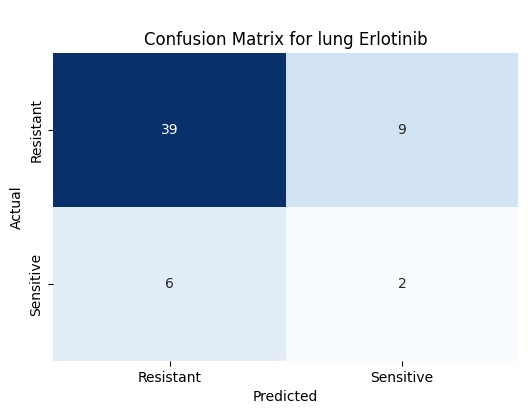

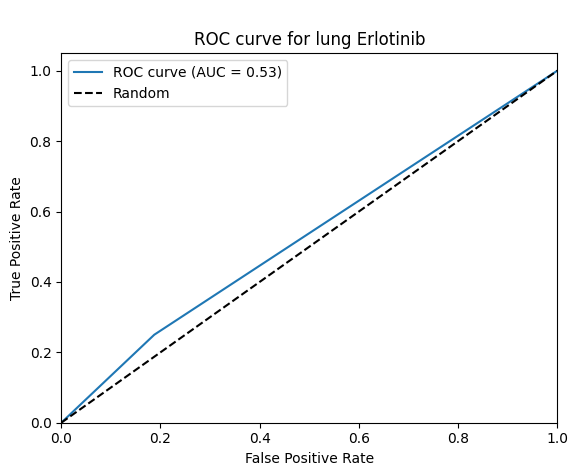

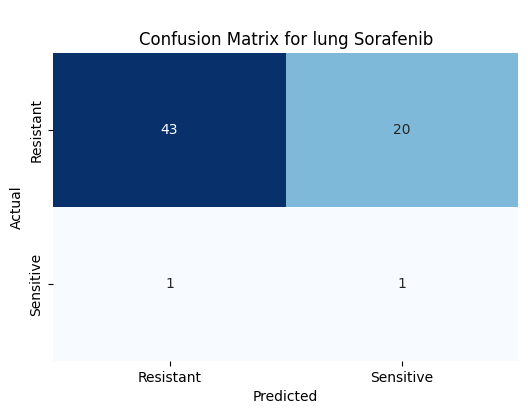

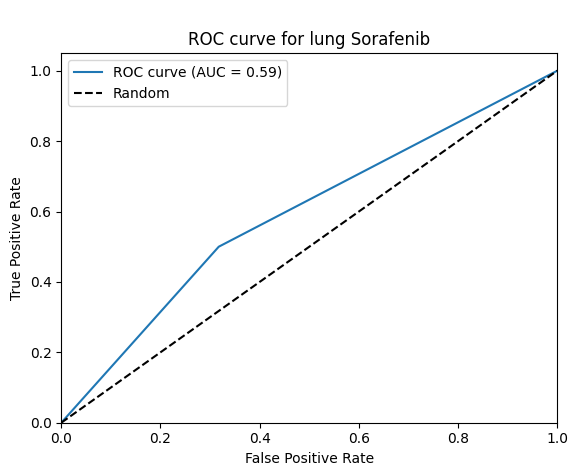

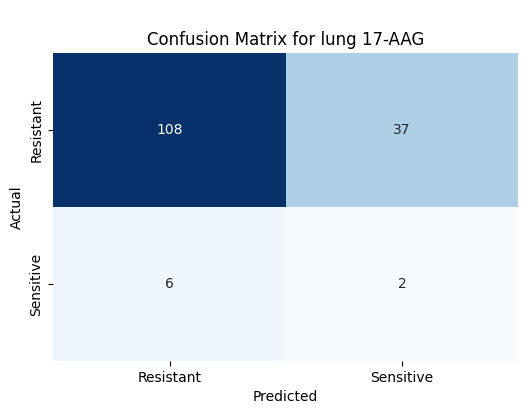

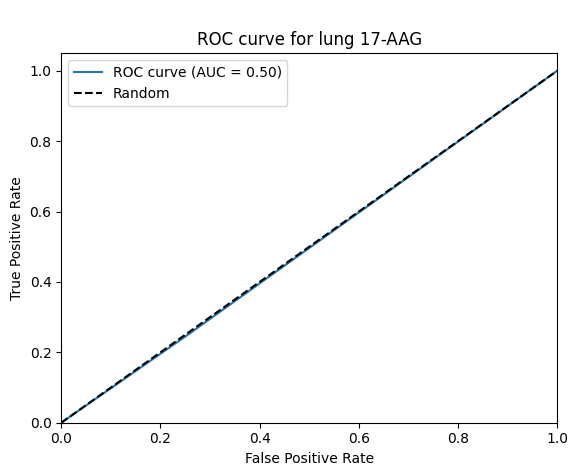

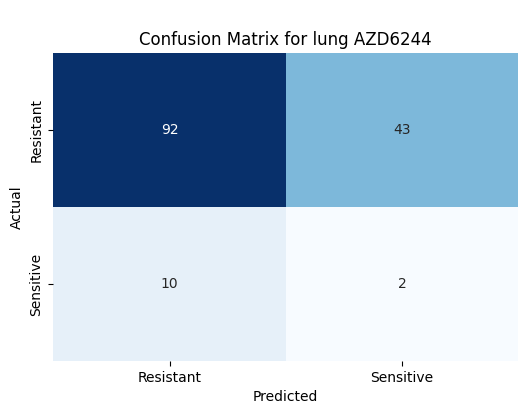

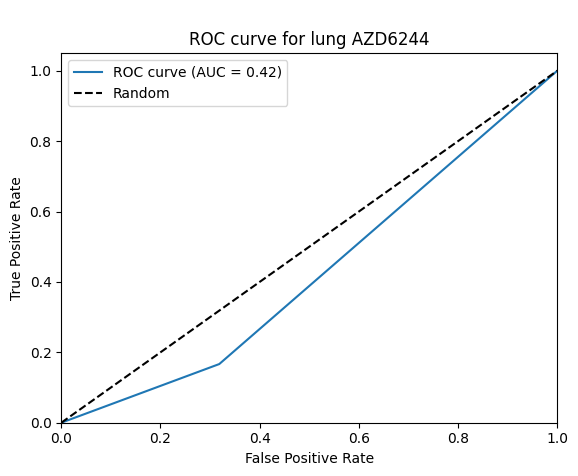

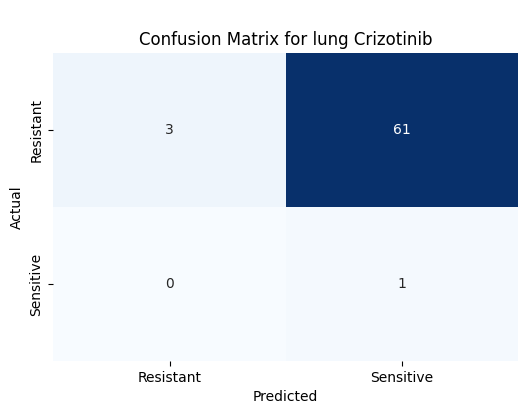

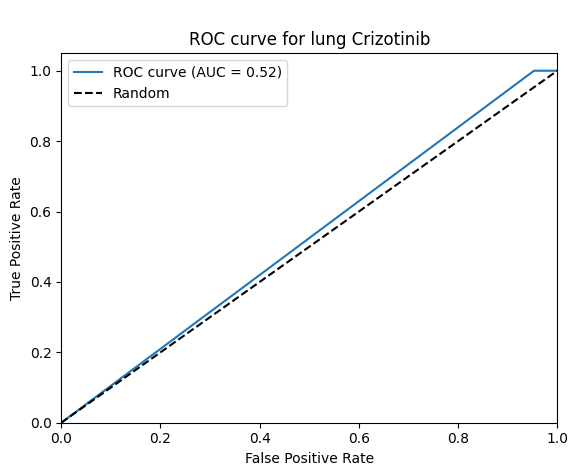

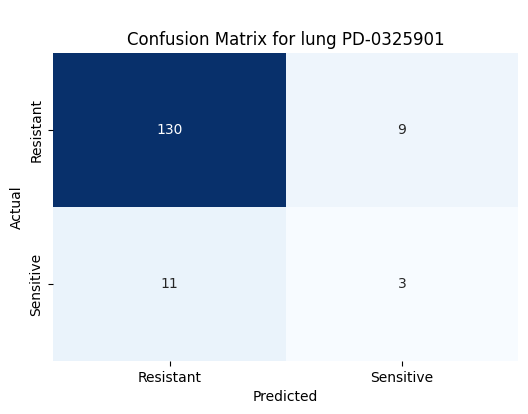

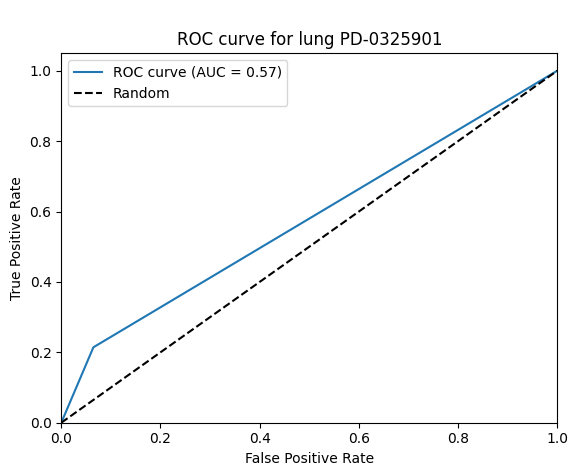

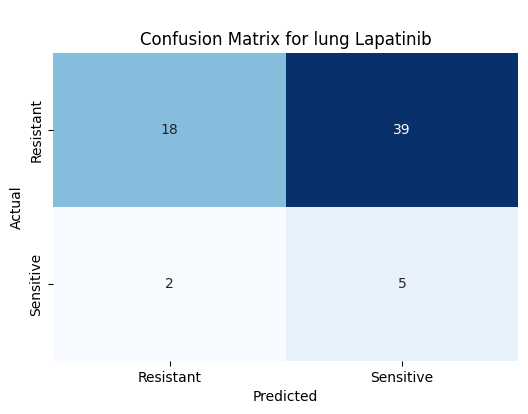

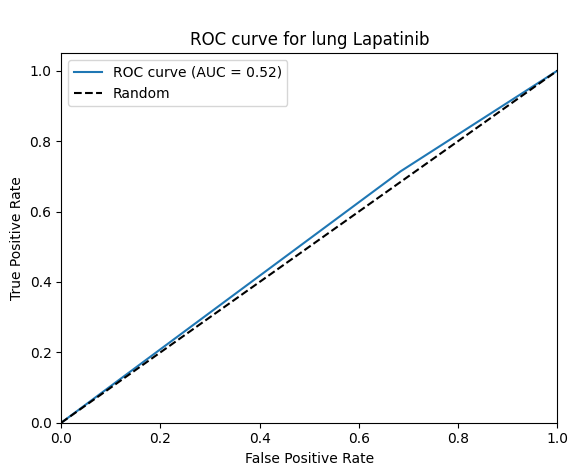

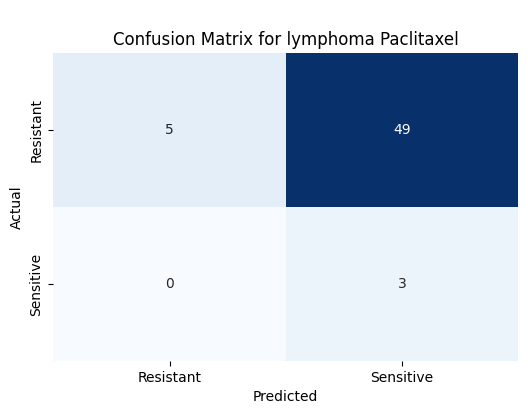

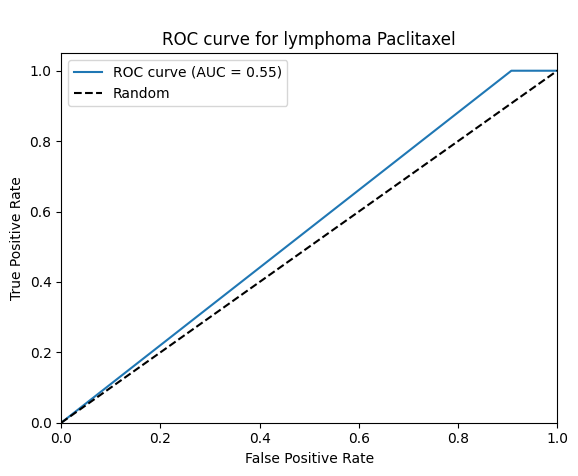

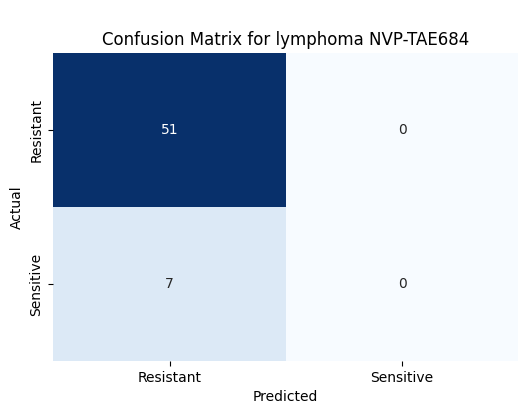

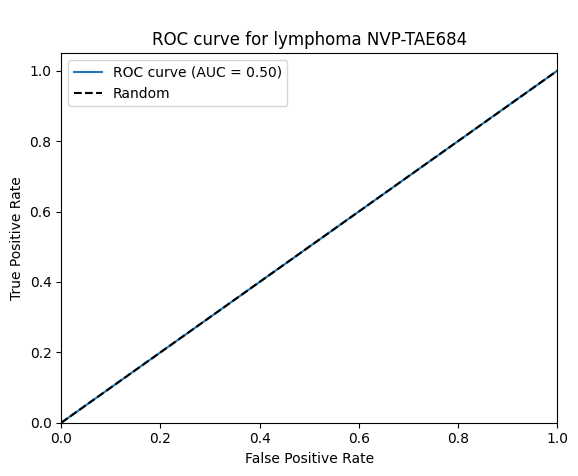

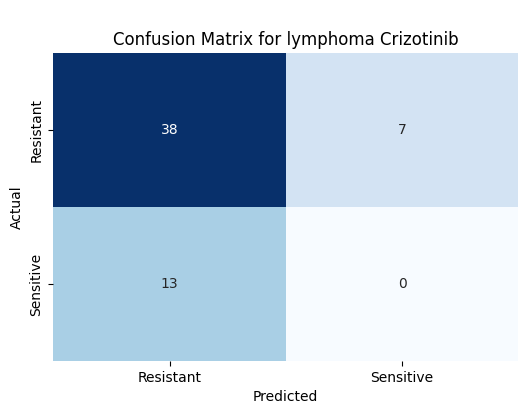

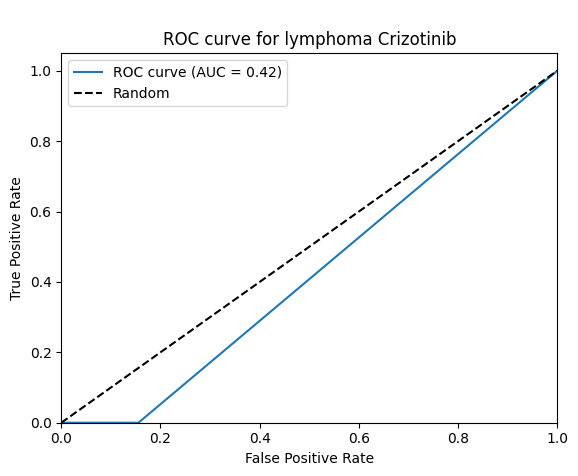

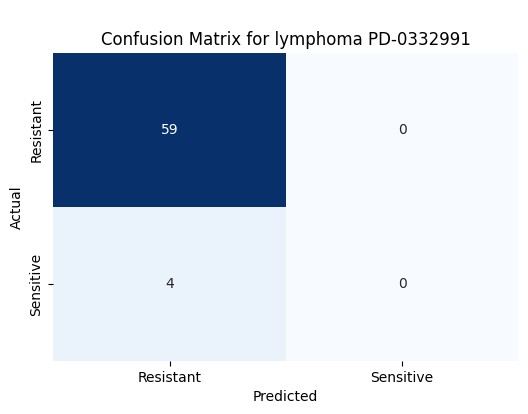

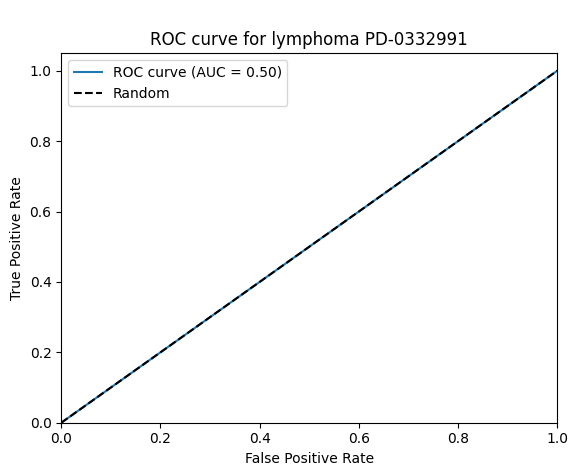

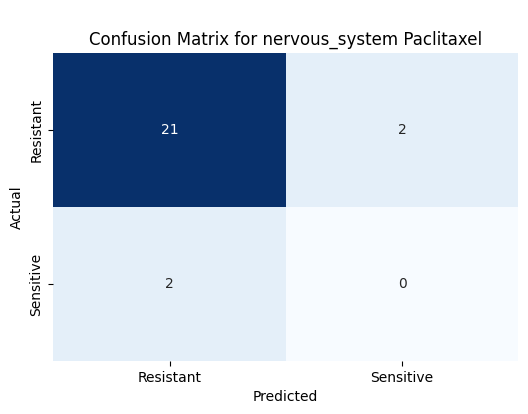

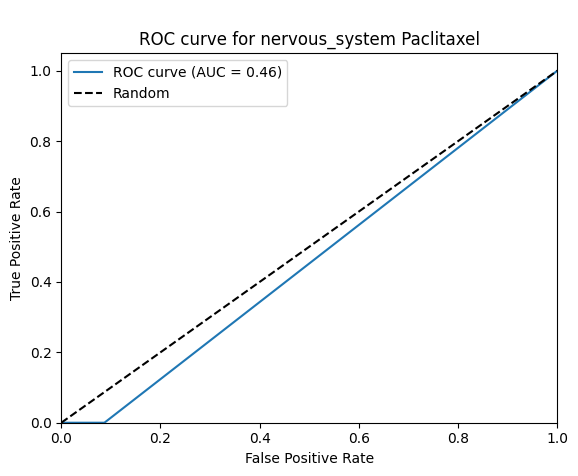

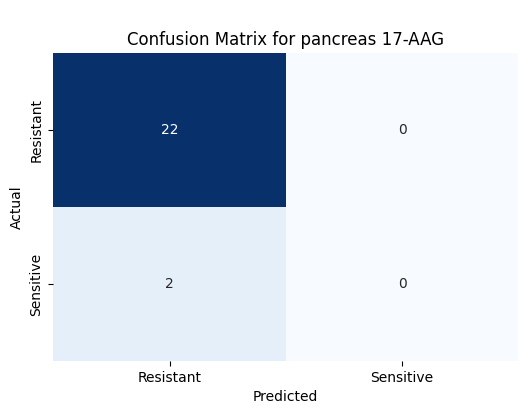

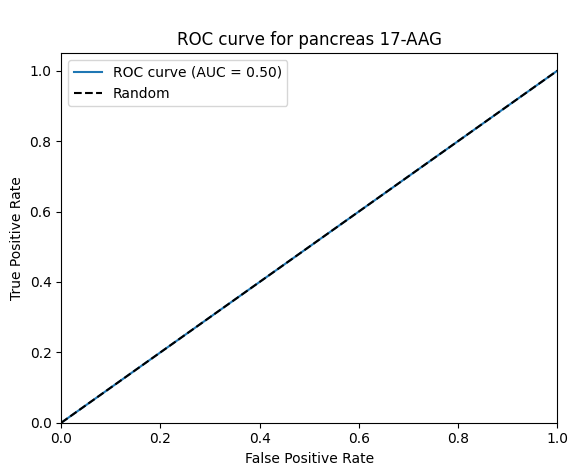

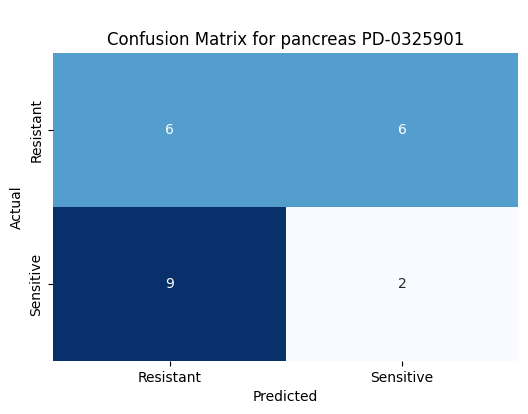

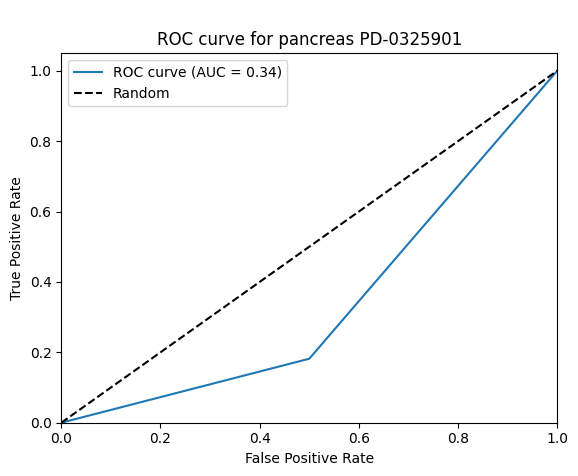

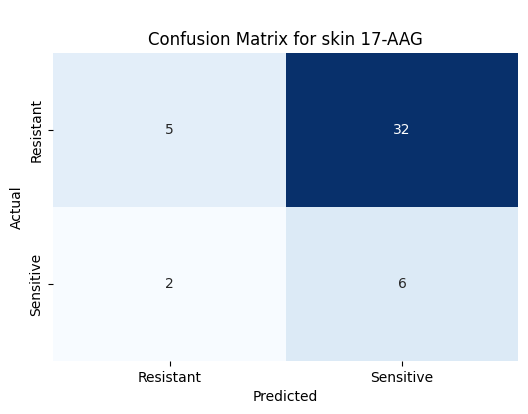

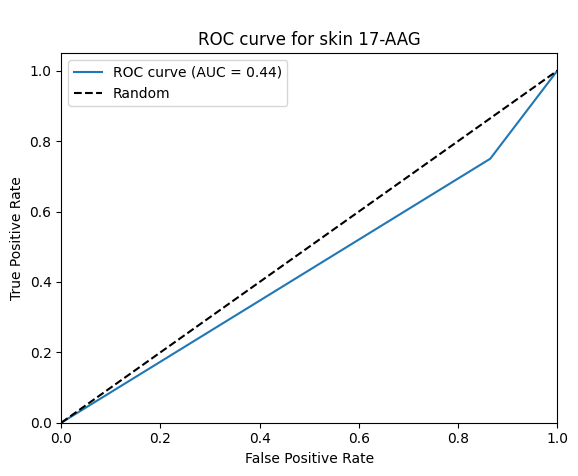

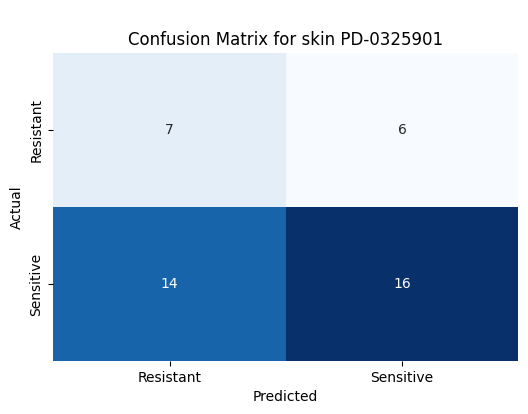

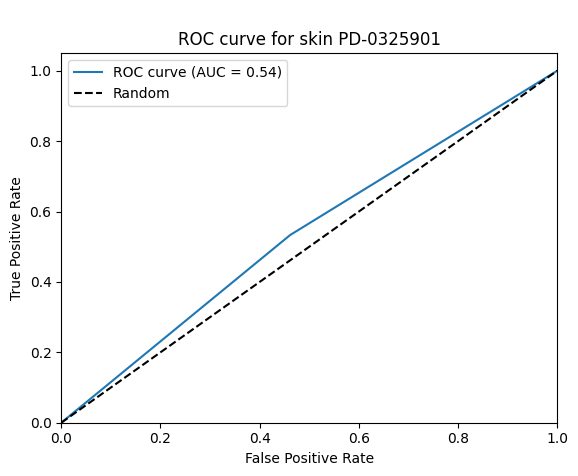

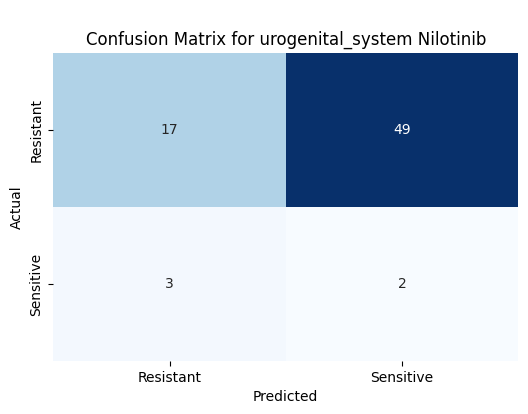

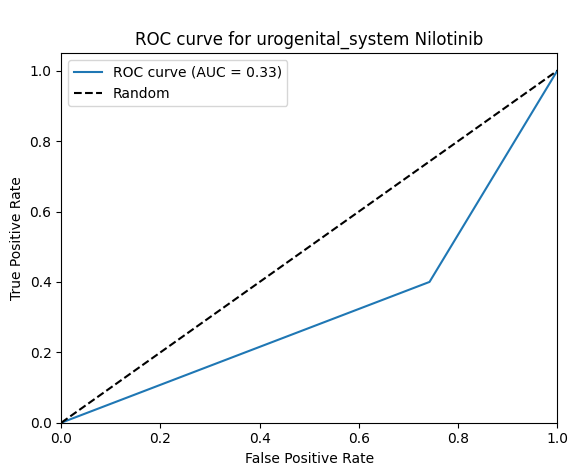

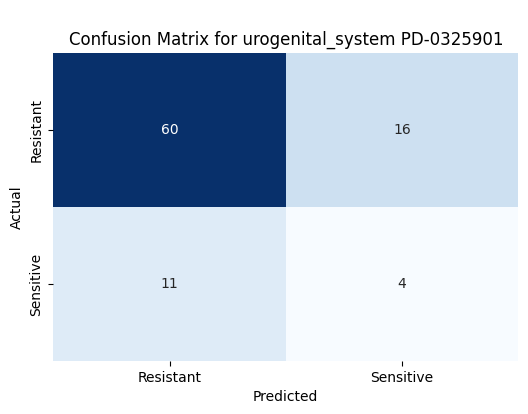

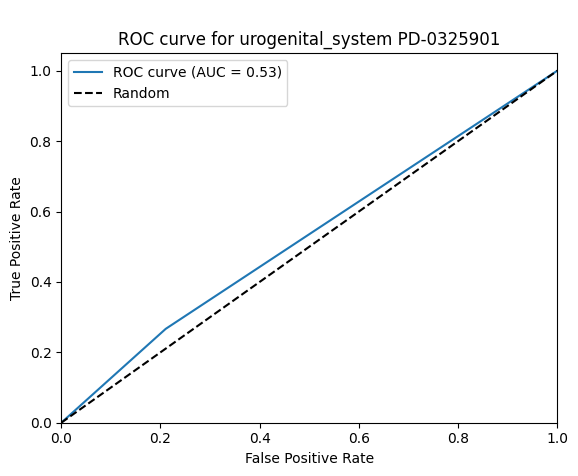

In [7]:
All_drugs_for_one_histology = dict()

for histology in histologies:
    
    one_drug = dict()
    os.chdir(os.path.join(output_dir_ccle,histology))
    drugs_for_histology_ccle = [item1 for item1 in os.listdir() if os.path.isdir(item1)]
    os.chdir(os.path.join(output_dir_gdsc,histology))
    drugs_for_histology_gdsc = os.listdir()
    if len(drugs_for_histology_ccle) > 0 and len(drugs_for_histology_gdsc) > 0:
        commom_drug_ccle_gdsc = set(drugs_for_histology_ccle).intersection(drugs_for_histology_gdsc)
        if len(commom_drug_ccle_gdsc) > 0:
            for drug in commom_drug_ccle_gdsc:
                os.chdir(os.path.join(output_dir_ccle,histology,drug))
                if len(os.listdir()) > 1:
                    boruta_drug_data_ccle = pd.read_csv(os.path.join(output_dir_ccle,histology,drug,drug+" "+histology+" "+"- Expression Data(IC50).tsv"), sep = ",")
                    boruta_drug_data_ccle['log IC50 (uM)'].replace('S',1, inplace = True)
                    boruta_drug_data_ccle['log IC50 (uM)'].replace('R',0, inplace = True)
                    os.chdir(os.path.join(output_dir_gdsc,histology,drug))
                    if len(os.listdir()) > 0:
                        
                        boruta_drug_data_gdsc = pd.read_csv(os.path.join(output_dir_gdsc,histology,drug,drug+" "+histology+" "+"- GDSC Histology Project.tsv"), sep = "\t")
                        boruta_drug_data_gdsc[drug].replace('S',1, inplace = True)
                        boruta_drug_data_gdsc[drug].replace('R',0, inplace = True)
                        if len(boruta_drug_data_ccle.columns) > 3 and len(boruta_drug_data_gdsc.columns) > 4:
                            
                            x_ccle = boruta_drug_data_ccle.drop(['Unnamed: 0', 'Cell Line', 'log IC50 (uM)'], axis=1)
                            x_gdsc = boruta_drug_data_gdsc.drop(['Cell Line', 'GDSC\nTissue descriptor 1', 'GDSC\nTissue\ndescriptor 2', drug], axis=1)
                            commom_feature_ccle_gdsc = set(x_ccle.columns).intersection(x_gdsc.columns)
                            if len(commom_feature_ccle_gdsc) > 0:
                                print(histology)
                                print(drug)
                                
                                features_name = commom_feature_ccle_gdsc
                                sample_number_train_ccle_drug = len(boruta_drug_data_ccle['Cell Line'])
                                sample_number_test_gdsc_drug = len(boruta_drug_data_gdsc['Cell Line'])
                                x_ccle = x_ccle[list(commom_feature_ccle_gdsc)]
                                y_ccle = boruta_drug_data_ccle['log IC50 (uM)']
                                
                                x_gdsc = x_gdsc[list(commom_feature_ccle_gdsc)]
                                y_gdsc = boruta_drug_data_gdsc[drug]
                                
                                features_name_number= len((x_gdsc).columns)
                                
                                x_ccle = np.array(x_ccle)
                                y_ccle = np.array(y_ccle)
                                x_gdsc = np.array(x_gdsc)
                                y_gdsc = np.array(y_gdsc)
                                
                                
                                # MODEL OLUŞTURUYORUZ
                                rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
                                
                                # k-fold kullanılıyor.
                                kfold = KFold(n_splits=5, random_state=1, shuffle = True)
                            
                                scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
                                cv_results = cross_validate(rf_model, x_ccle, y_ccle, cv=kfold, scoring=scoring)
                            
                                average_scores = {score: cv_results['test_'+score].mean() for score in scoring}
                                best_score_criteria = max(average_scores, key=average_scores.get)
                                best_model_index = np.argmax(cv_results['test_'+best_score_criteria])
                                best_model = rf_model
                                best_model.fit(x_ccle, y_ccle)
                                
                                # Tahmin yapılıyor.
                                y_gdsc_pred = best_model.predict(x_gdsc)

                            
                                avg_accuracy = cv_results['test_accuracy'].mean()
                                avg_precision = cv_results['test_precision_macro'].mean()
                                avg_recall = cv_results['test_recall_macro'].mean()
                                avg_f1 = cv_results['test_f1_macro'].mean()
                            
    
                                tn, fp, fn, tp = confusion_matrix(y_gdsc, y_gdsc_pred).ravel()
                                TN_value = tn
                                FP_value = fp
                                FN_value = fn
                                TP_value = tp
                                
                                class_labels = ['Resistant', 'Sensitive']

                                # Calculate the confusion matrix
                                confusion = confusion_matrix(y_gdsc, y_gdsc_pred)

                                # Create a DataFrame for the confusion matrix
                                confusion_df = pd.DataFrame(confusion, index=class_labels, columns=class_labels)


                                # Create a heatmap for visualisation
                                plt.figure(figsize=(6, 4))
                                sns.heatmap(confusion_df, annot=True, cmap='Blues', fmt='d', cbar=False)
                                plt.xlabel('Predicted')
                                plt.ylabel('Actual')
                                plt.title(f'\nConfusion Matrix for {histology} {drug}')
                                os.makedirs(os.path.join(output_dir_gdsc, histology, drug, "Result_rf_k_fold"))
                                os.chdir(os.path.join(output_dir_gdsc,histology,drug,"Result_rf_k_fold"))
                                plt.savefig('Confusion Matrix.png', bbox_inches='tight')
                                
                            
                                fpr, tpr, thresholds = roc_curve(y_gdsc, y_gdsc_pred) 
                                roc_auc = auc(fpr, tpr)
                                # Plot the ROC curve
                                plt.figure()  
                                plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
                                plt.plot([0, 1], [0, 1], 'k--', label='Random')
                                plt.xlim([0.0, 1.0])
                                plt.ylim([0.0, 1.05])
                                plt.xlabel('False Positive Rate')
                                plt.ylabel('True Positive Rate')
                                plt.title(f'\nROC curve for {histology} {drug}')
                                plt.legend()
                                os.chdir(os.path.join(output_dir_gdsc,histology,drug,"Result_rf_k_fold"))
                                plt.savefig('ROC Curve.png')
                            
                            
                    
                                result_table_drug = pd.DataFrame({
                                'Histology': [histology],
                                'Drug': [drug],
                                'Number of Sample-Train Data (CCLE)': [sample_number_train_ccle_drug],
                                'Number of Sample-Test Data (GDSC) ': [sample_number_test_gdsc_drug],
                                'Number of Feature': [features_name_number],
                                'Name of Features': [features_name],
                                'TPs (True Positives)': [TP_value],
                                'TNs (True Negatives)': [TN_value],
                                'FPs (False Positives)': [FP_value],
                                'FNs (False Negatives)': [FN_value],
                                'Precision': [avg_precision],
                                'Recall': [avg_recall],
                                'F1 Score': [avg_f1],
                                'Accuracy': [avg_accuracy],
                                'AUC': [roc_auc]   
                                 })
                                one_drug[drug] = result_table_drug
                                print(one_drug[drug])
                                
                                
    if one_drug:
        All_drugs_for_one_histology[histology] = pd.concat(one_drug)
                            
                            
    
if All_drugs_for_one_histology:
    All_histologies_drugs_result = pd.concat(All_drugs_for_one_histology)





In [8]:
All_histologies_drugs_result_new_rf = All_histologies_drugs_result.sort_values(by='AUC', ascending=False)

In [9]:
All_histologies_drugs_result_new_rf.to_excel(os.path.join(output_dir_gdsc, "All RESULT_RF_Classification_k_fold .xlsx"), index=False)